#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 08
**CH08A Finding a good deal among hotels with nonlinear function**

using the hotels-vienna dataset

version 0.9.0 2025-08-14

In [1]:
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

warnings.filterwarnings("ignore")

In [2]:

# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/hotels-vienna/clean/"
data_out = dirname + "da_case_studies/ch08-hotels-measurement-error/"
output = dirname + "da_case_studies/ch08-hotels-measurement-error/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)


In [3]:

# Import the prewritten helper functions
import py_helper_functions as da

sns.set_theme(rc=da.da_theme, palette=da.color)

In [4]:
# load vienna
hotels = pd.read_csv(data_in + "hotels-vienna.csv")
#data = pd.read_csv("https://osf.io/y6jvb/download")

### 🕵️‍♀️ Bellonda's Logic Decoder: Constructing the Analytical Sample
**The Syntax Anatomy:**
* `hotels.loc[...]` (**Selector**) $\to$ Filters rows based on the boolean mask.
* `(cond1) & (cond2)`: **Bitwise AND**. All conditions must be True.
* `notna()`: Explicitly removes missing values (crucial for regression samples).

**Data Flow:** `(All Hotels)` $\to$ `(Vienna 3-4 Star Hotels < €600)`
**Student Note:** Notice the `price <= 600` cutoff. This is likely "Winsorization" or outlier removal based on domain knowledge to prevent a few luxury suites from skewing the regression coefficients.

In [5]:
hotels = hotels.loc[
    (hotels["accommodation_type"] == "Hotel")
    & (hotels["city_actual"] == "Vienna")
    & (hotels["stars"] >= 3)
    & (hotels["stars"] <= 4)
    & (hotels["stars"].notna())
    & (hotels["price"] <= 600)
]


#### LOG MODELS

In [6]:
hotels['lnprice'] = np.log(hotels['price'])
hotels['distance2'] = hotels['distance']
hotels.loc[hotels['distance2'] < 0.05, 'distance2'] = 0.05 #lets not have exact 0 distance!
hotels['lndistance'] = np.log(hotels['distance2'])

In [7]:
hotels["price"].describe()


count    207.000000
mean     109.975845
std       42.221381
min       50.000000
25%       82.000000
50%      100.000000
75%      129.500000
max      383.000000
Name: price, dtype: float64

In [7]:
hotels["lnprice"].describe()


count    207.000000
mean       4.640219
std        0.336751
min        3.912023
25%        4.406719
50%        4.605170
75%        4.863673
max        5.948035
Name: lnprice, dtype: float64

## Regression

In [9]:
reg1 = smf.ols("price ~ distance", data=hotels).fit()
reg1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     38.20
Date:                Thu, 01 May 2025   Prob (F-statistic):           3.39e-09
Time:                        11:16:57   Log-Likelihood:                -1050.3
No. Observations:                 207   AIC:                             2105.
Df Residuals:                     205   BIC:                             2111.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    132.0170      4.474     29.511      0.000     123.197     140.837
distance     -14.4064      2.331     -6.181      0.000     -19.002      -9.811
==============================================================================
Omnibus:                      141.994   Durbin-Watson:                   1.479
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1560.025
Skew:                           2.497   Prob(JB):                         0.00
Kurtosis:                      15.488   Cond. No.                         3.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
reg2 = smf.ols("price ~ lndistance", data=hotels).fit()
reg2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     79.58
Date:                Thu, 01 May 2025   Prob (F-statistic):           2.61e-16
Time:                        11:16:57   Log-Likelihood:                -1034.1
No. Observations:                 207   AIC:                             2072.
Df Residuals:                     205   BIC:                             2079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    112.4171      2.512     44.757      0.000     107.465     117.369
lndistance   -24.7683      2.777     -8.921      0.000     -30.243     -19.294
==============================================================================
Omnibus:                      175.079   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3501.545
Skew:                           3.084   Prob(JB):                         0.00
Kurtosis:                      22.182   Cond. No.                         1.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
reg3 = smf.ols("lnprice ~ distance", data=hotels).fit()
reg3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     52.90
Date:                Thu, 01 May 2025   Prob (F-statistic):           7.30e-12
Time:                        11:16:57   Log-Likelihood:                -44.160
No. Observations:                 207   AIC:                             92.32
Df Residuals:                     205   BIC:                             98.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8411      0.035    139.720      0.000       4.773       4.909
distance      -0.1313      0.018     -7.273      0.000      -0.167      -0.096
==============================================================================
Omnibus:                       28.470   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.450
Skew:                           0.746   Prob(JB):                     4.97e-11
Kurtosis:                       4.809   Cond. No.                         3.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
reg4 = smf.ols("lnprice ~ lndistance", data=hotels).fit()
reg4.summary()
# reg4.summary(slim = True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     102.6
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           8.18e-20
Time:                        20:56:42   Log-Likelihood:                -25.911
No. Observations:                 207   AIC:                             55.82
Df Residuals:                     205   BIC:                             62.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6615      0.019    241.926      0.000       4.623       4.699
lndistance    -0.2158      0.021    -10.130      0.000      -0.258      -0.174
==============================================================================
Omnibus:                       47.573   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.794
Skew:                           0.976   Prob(JB):                     1.08e-28
Kurtosis:                       6.335   Cond. No.                         1.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Figure 8.1 Regressions of hotel price and distance to the city center

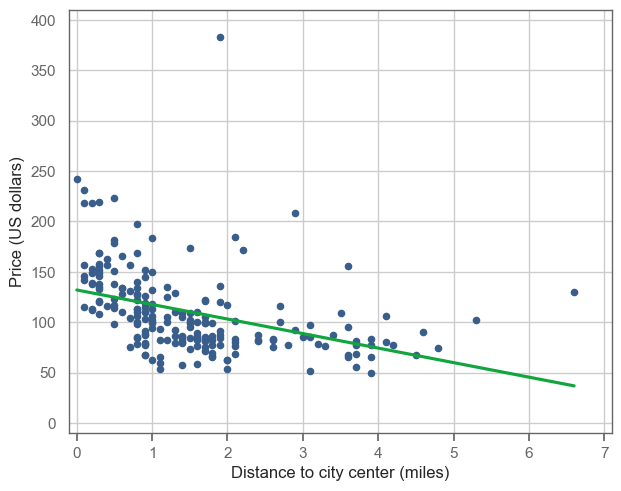

In [ ]:
sns.regplot(
    data=hotels,
    x="distance",
    y="price",
    ci=False,
    line_kws=dict(color=da.color[1]),
    scatter_kws=dict(alpha=1, s=20),
)

plt.xlabel("Distance to city center (miles)", fontsize=12)
plt.ylabel("Price (US dollars)", fontsize=12)
plt.xlim(-0.1, 7.1)
plt.xticks(np.arange(0, 7.1, 1))
plt.ylim(-10, 410)
plt.yticks(np.arange(0, 410, 50))


plt.show()

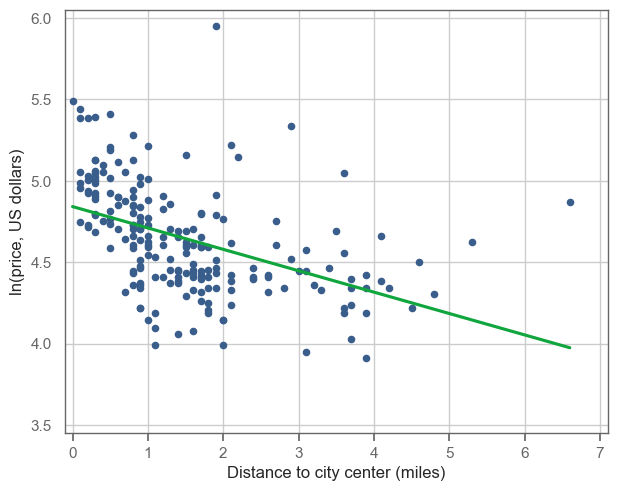

In [ ]:
sns.regplot(
    data=hotels,
    x="distance",
    y="lnprice",
    ci=True,
    line_kws=dict(color=da.color[1]),
    scatter_kws=dict(alpha=1, s=20),
)

plt.xlabel("Distance to city center (miles)", fontsize=12)
plt.ylabel("ln(price, US dollars)", fontsize=12)
plt.xlim(-0.1, 7.1)
plt.xticks(np.arange(0, 7.1, 1))
plt.ylim(3.45, 6.05)
plt.yticks(np.arange(3.5, 6.1, 0.5))


plt.show()

### Figure 8.2 Regressions of hotel price and distance to the city center

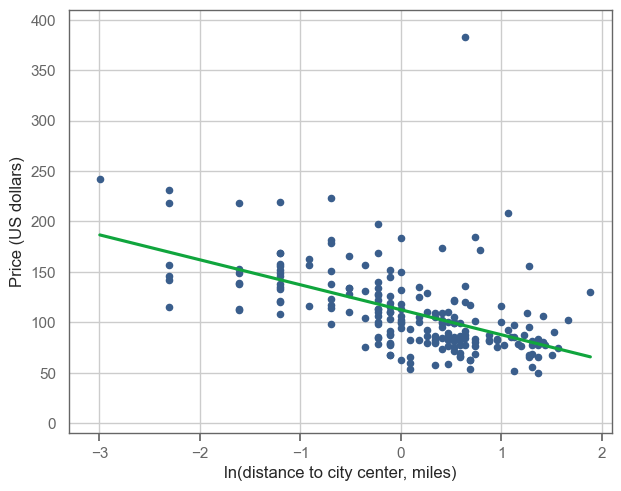

In [15]:
sns.regplot(
    data=hotels,
    x="lndistance",
    y="price",
    ci=False,
    line_kws=dict(color=da.color[1]),
    scatter_kws=dict(alpha=1, s=20),
)

plt.xlabel("ln(distance to city center, miles)", fontsize=12)
plt.ylabel("Price (US dollars)", fontsize=12)
plt.xlim(-3.3, 2.1)
plt.xticks(np.arange(-3, 2.1, 1))
plt.ylim(-10, 410)
plt.yticks(np.arange(0, 410, 50))


plt.show()

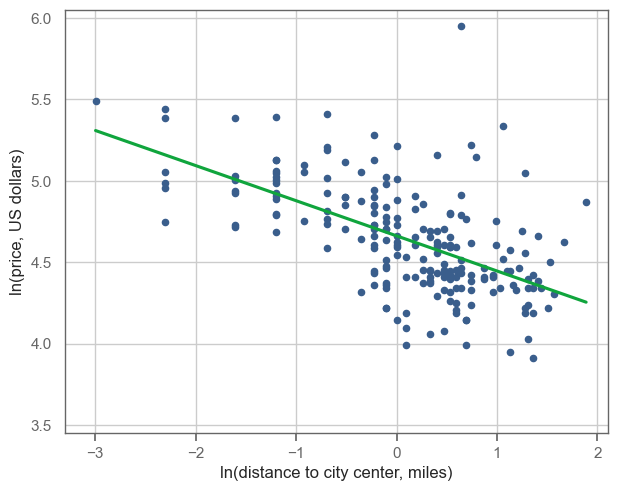

In [16]:
sns.regplot(data=hotels, x="lndistance", y="lnprice",ci = False,line_kws=dict(color=da.color[1]),scatter_kws=dict(alpha = 1,s = 20))

plt.xlabel("ln(distance to city center, miles)", fontsize=12)
plt.ylabel("ln(price, US dollars)", fontsize=12)
plt.xlim(-3.3, 2.1)
plt.xticks(np.arange(-3, 2.1, 1))  
plt.ylim(3.45, 6.05)
plt.yticks(np.arange(3.5, 6.1, 0.5))  


plt.show()

### 🕵️‍♀️ Bellonda's Logic Decoder: Regression Table Generation
**The Syntax Anatomy:**
* `Stargazer([...])`: **Aggregator**. Collects model objects.
* `.covariate_order(...)`: **Sorter**. Forces specific variables to the top (usually the variable of interest, then controls).
* `.custom_columns(...)`: **Labeler**. Adds the "Dependent Variable" header row.

**Data Flow:** `(4 Regression Objects)` $\to$ `(1 Formatted HTML Table)`
**Student Note:** Be careful interpreting the "Constant" across these models. In a Log-Log model, the constant has no direct economic interpretation without transformation.

In [17]:
stargazer = Stargazer([reg1, reg3, reg2, reg4])
stargazer.covariate_order(["distance", "lndistance", "Intercept"])
stargazer.custom_columns(["price", "ln(price)", "price", "ln(price)"], [1, 1, 1, 1])
stargazer.rename_covariates(
    {
        "Intercept": "Constant",
        "distance": "Distance to city center, miles",
        "lndistance": "ln(distance to city center)",
    }
)
stargazer
